In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2}) # use map to encode

In [7]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [8]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean()) # mean, median

In [9]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [11]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


<AxesSubplot:xlabel='Pclass'>

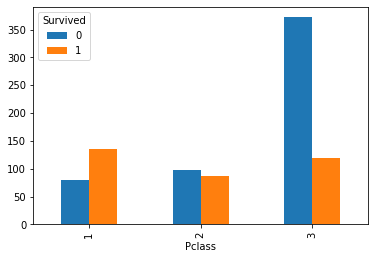

In [19]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

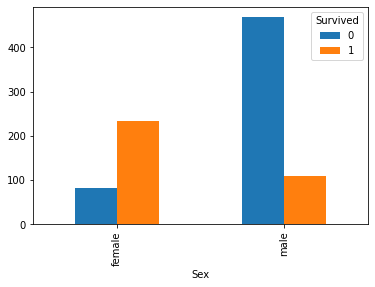

In [21]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Age'>

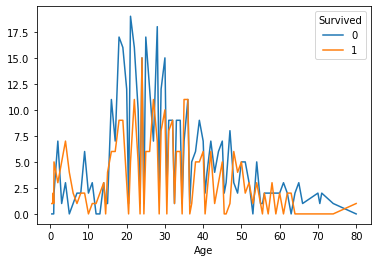

In [25]:
pd.crosstab(df.Age, df.Survived).plot(kind='line')

<AxesSubplot:xlabel='Fare'>

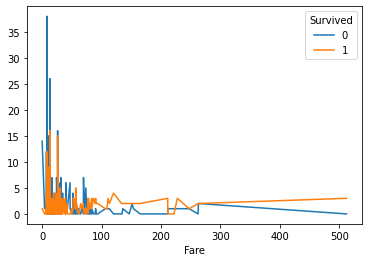

In [27]:
pd.crosstab(df.Fare, df.Survived).plot(kind='line')

In [28]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.1)

In [36]:
len(X_train)

801

In [37]:
len(X_test)

90

In [38]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
model.score(X_test,y_test)

0.8